## AN2DL 2023 - Homework 2

To show all of our development process we have left alternative approaches, which did not contribute to the final model, as commented blocks inside the notebook.

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/AN2DL/Homework 2/

Mounted at /gdrive
/gdrive/My Drive/AN2DL/Homework 2


In [2]:
# Conditional check for unzipping
unzip = False

# Unzip the 'public_data.zip' file if the 'unzip' flag is True
if unzip:
    !unzip training_dataset.zip

## Imports


In [2]:
seed = 42

import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision
mixed_precision.set_global_policy('mixed_float16')
from sklearn.preprocessing import RobustScaler

## Data Loading

In [3]:
# logfile hint: each row of the dataset has been normalised to the range [0,1] independently of the other rows
data = np.load(os.path.join(os.path.abspath(""), 'training_data.npy'), allow_pickle=True)
# data = np.load('../input/dataset-hw2/training_data.npy', allow_pickle=True)
print(data.shape)
for i in range(10):
  print(data[i])

(48000, 2776)
[0.         0.         0.         ... 0.60277778 0.36759259 0.33148148]
[0.    0.    0.    ... 0.6   0.46  0.396]
[0.         0.         0.         ... 0.96048126 0.94650625 0.97714021]
[0.         0.         0.         ... 0.47058824 0.56958393 0.57101865]
[0.         0.         0.         ... 0.72727273 0.81818182 0.84090909]
[0.         0.         0.         ... 0.65306122 0.63265306 0.64285714]
[0.         0.         0.         ... 0.84149184 0.84149184 0.83449883]
[0.      0.      0.      ... 0.8625  0.87625 0.895  ]
[0.         0.         0.         ... 0.12483039 0.13297151 0.10447761]
[0.         0.         0.         ... 0.09802158 0.09172662 0.09532374]


In [4]:
data_mask = np.load(os.path.join(os.path.abspath(""), 'valid_periods.npy'), allow_pickle=True)
# data_mask = np.load('../input/dataset-hw2/valid_periods.npy', allow_pickle=True)
print(data_mask.shape)
for i in range(10):
  print(data_mask[i])

(48000, 2)
[2325 2776]
[2325 2776]
[2325 2776]
[2712 2776]
[2682 2776]
[2128 2776]
[2682 2776]
[2682 2776]
[1972 2776]
[2428 2776]


In [5]:
categories = np.load(os.path.join(os.path.abspath(""), 'categories.npy'), allow_pickle=True)
# categories = np.load('../input/dataset-hw2/categories.npy', allow_pickle=True)
print(categories.shape)
for i in range(10):
  print(categories[i])

(48000,)
D
D
D
D
D
D
D
D
D
D


In [6]:
# get the distribution of categories
# categories = Demography, Finance, Industry, Macroeconomy, Microeconomy, Other
unique, count = np.unique(categories, return_counts=True)
print('categories:', unique)
for u in range(unique.size):
    print(f'category {unique[u]} has {count[u]} samples')

categories: ['A' 'B' 'C' 'D' 'E' 'F']
category A has 5728 samples
category B has 10987 samples
category C has 10017 samples
category D has 10016 samples
category E has 10975 samples
category F has 277 samples


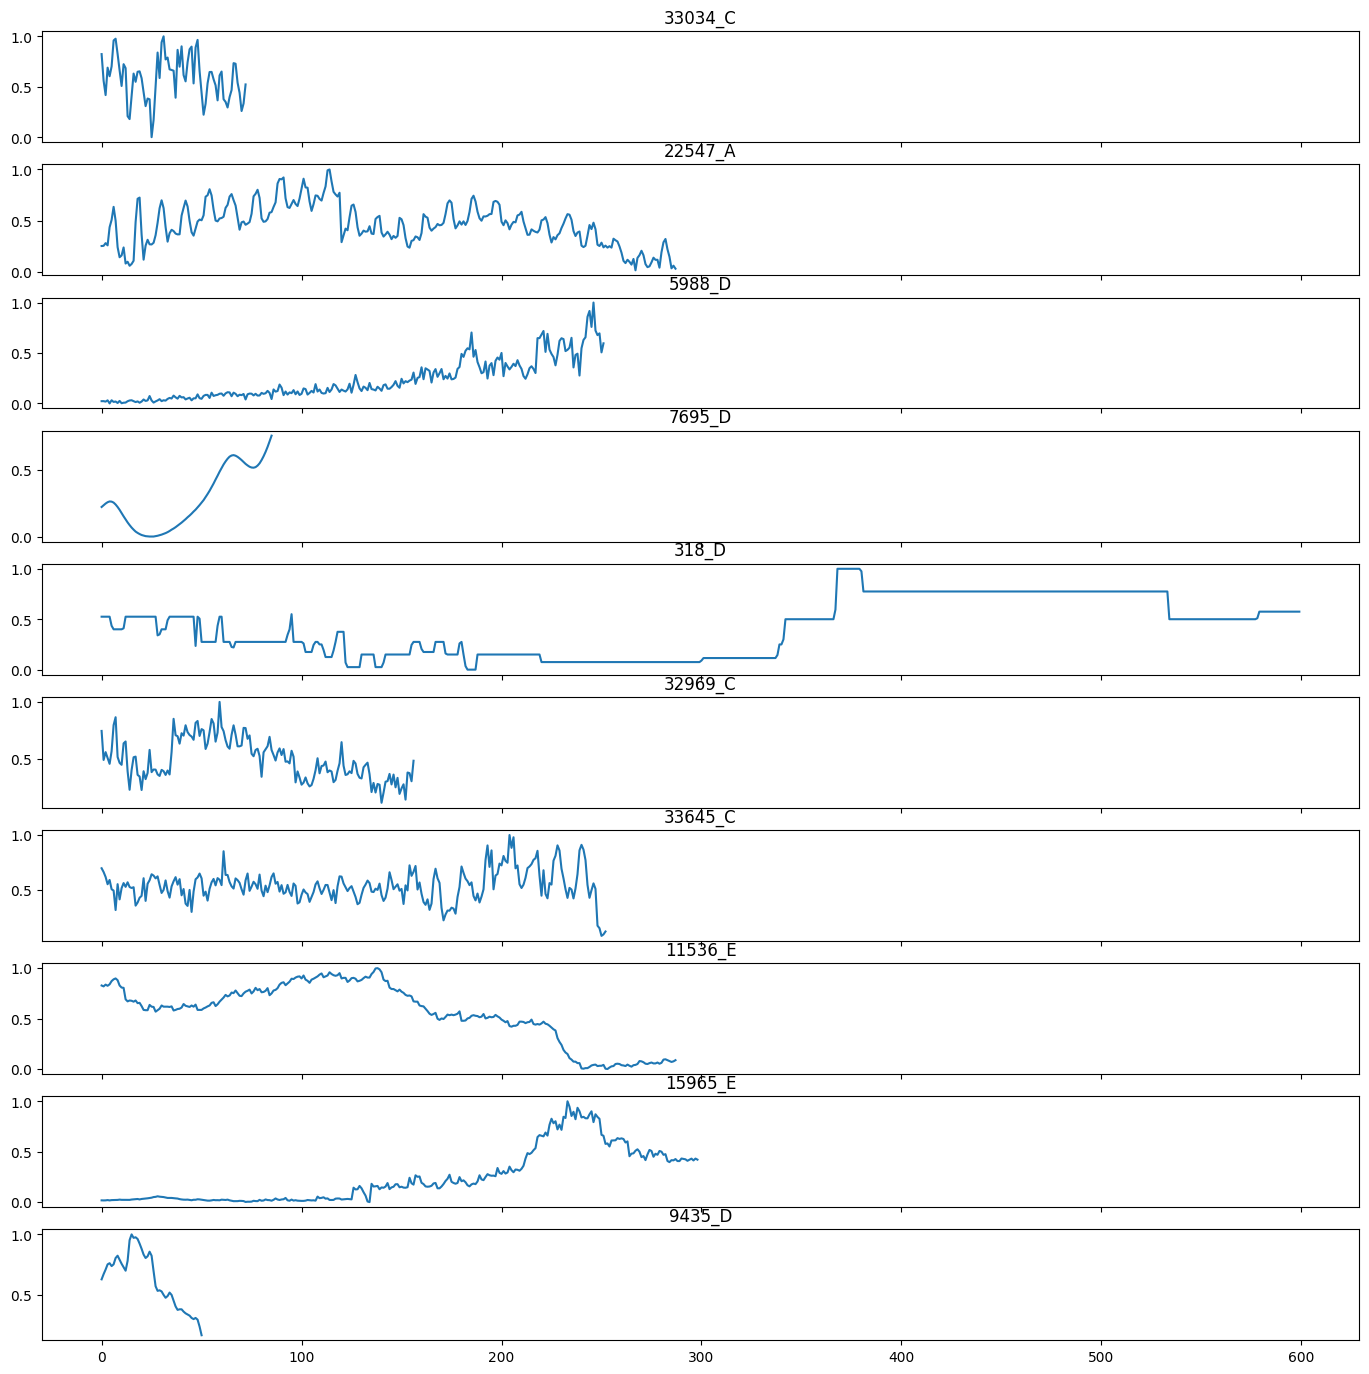

In [7]:
# plot 10 randomly chosen time series from the train dataset
def inspect_data(data):
    figs, axs = plt.subplots(10, 1, sharex=True, figsize=(17,17))
    for i, val in enumerate([randint(0, data.shape[0]) for _ in range(10)]):
        begin = data_mask[val][0]
        end = data_mask[val][1]
        # apply mask to only plot actual data
        axs[i].plot(data[val][begin:end])
        axs[i].set_title(str(val) + "_" + categories[val])
    plt.show()
inspect_data(data)

## Robust Scaling

In [ ]:
# # Robust Scaler
# robust_scaler = RobustScaler()
# robust_scaler.fit(data)
# data_scaled = robust_scaler.transform(data)
# data_scaled.shape

## Standard Scaling

In [ ]:
# manual standard scaling
# only taking into account non-padded values

# from scipy.stats import iqr

# mean_std = []
# for i in range(len(data)):
#   begin = data_mask[i][0]
#   end = data_mask[i][1]
#   values = data[i][begin:end]
#   mean = np.mean(values)
#   std = np.std(values)
#   mean_std.append((mean, std))
# mean_std = np.array(mean_std)

# print(mean_std[0])
# print(mean_std.shape)

In [ ]:
# data_scaled = []
# for i in range(len(data)):
#   data_scaled.append([])
#   for j in range(data_mask[i][0]):
#     data_scaled[i].append(0)
#   for j in range(data_mask[i][0], data_mask[i][1]):
#     data_scaled[i].append((data[i][j] - mean_std[i][0]) / mean_std[i][1])

# data_scaled = np.array(data_scaled)
# for i in range(10):
#   print(data_scaled[i])
# print(data_scaled.shape)

In [ ]:
# plot the same 10 time series with robust scaling
# def inspect_data(data):
#     figs, axs = plt.subplots(10, 1, sharex=True, figsize=(17,17))
#     for i, val in enumerate(random_indices):
#         begin = data_mask[val][0]
#         end = data_mask[val][1]
#         # apply mask to only plot actual data
#         axs[i].plot(data[val][begin:end])
#         axs[i].plot(data_scaled[val][begin:end], color='orange')
#         axs[i].set_title(str(val) + "_" + categories[val])
#     plt.show()
# inspect_data(data)

In [ ]:
# data = data_scaled

## Auto Correlation

In [ ]:
# # auto correlation
# import tensorflow_probability as tfp

# data_auto_correlated = tfp.stats.auto_correlation(data)

## Split Dataset

In [8]:
# split into training and validation
# a test dataset is not necessary since we test on the codalab dataset
# splitting is done sequence-wise, we could also split each sequence at a certain position but they have differing lengths which makes it more difficult
# stratified by categories (maybe unnecessary)
X_train, X_val, mask_train, mask_val, categories_train, categories_val = train_test_split(
    data,
    data_mask,
    categories,
    test_size = 0.15,
    random_state = seed,
    stratify = categories
)

# Print the shapes of the resulting sets
print('Training set shape:\t',X_train.shape)
print('Validation set shape:\t',X_val.shape)
print('Training mask shape:\t',mask_train.shape)
print('Validation mask shape:\t',mask_val.shape)
print('Training categories shape:\t',categories_train.shape)
print('Validation categories shape:\t',categories_val.shape)


Training set shape:	 (40800, 2776)
Validation set shape:	 (7200, 2776)
Training mask shape:	 (40800, 2)
Validation mask shape:	 (7200, 2)
Training categories shape:	 (40800,)
Validation categories shape:	 (7200,)


## Build Sequences

In [9]:
# modified version of the build_sequences() function presented in the TA session
# window: length of the sequence (needs to be 200 because the sequences in the test set also have length 200)
# stride: offset by which we generate sequences
# telescope: length of the part behind the window (targets) -> set to 1 because we are doing one-step-ahead forecasting
def build_sequences(inp, mask, categories, window=200, stride=2, telescope=1):
    # Sanity check to avoid runtime errors
    assert window % stride == 0
    dataset = []
    targets = []
    new_categories = []

    # iterate through all sequences in the input dataset
    for i in range(inp.shape[0]):
      # apply mask
      begin = mask[i][0]
      end = mask[i][1]
      datapoint = inp[i][begin:end]
      # category is the same for all the sequences that are generated from one datapoint
      category = categories[i]

      temp_datapoint = datapoint.copy()
      padding_check = datapoint.shape[0] % window

      if(padding_check != 0):
          # Compute padding length
          # maximum length of padding = stride (in the TA notebook the maximum is window)
          padding_len = stride - datapoint.shape[0] % stride
          padding = np.zeros(padding_len, dtype='float32')
          temp_datapoint = np.concatenate((padding, datapoint))
          assert temp_datapoint.shape[0] % stride == 0

      for idx in np.arange(0,temp_datapoint.shape[0]-window-telescope,stride):
          dataset.append(temp_datapoint[idx:idx+window])
          targets.append(temp_datapoint[idx+window:idx+window+telescope])
          new_categories.append(category)

    dataset = np.array(dataset)
    targets = np.array(targets)
    new_categories = np.array(new_categories)
    return dataset, targets, new_categories

sequences_train, targets_train, sequences_categories_train = build_sequences(X_train, mask_train, categories_train)
print(sequences_train.shape)
print(targets_train.shape)
print(sequences_categories_train.shape)

sequences_val, targets_val, sequences_categories_val = build_sequences(X_val, mask_val, categories_val)
print(sequences_val.shape)
print(targets_val.shape)
print(sequences_categories_val.shape)

(1086935, 200)
(1086935, 1)
(1086935,)
(194792, 200)
(194792, 1)
(194792,)


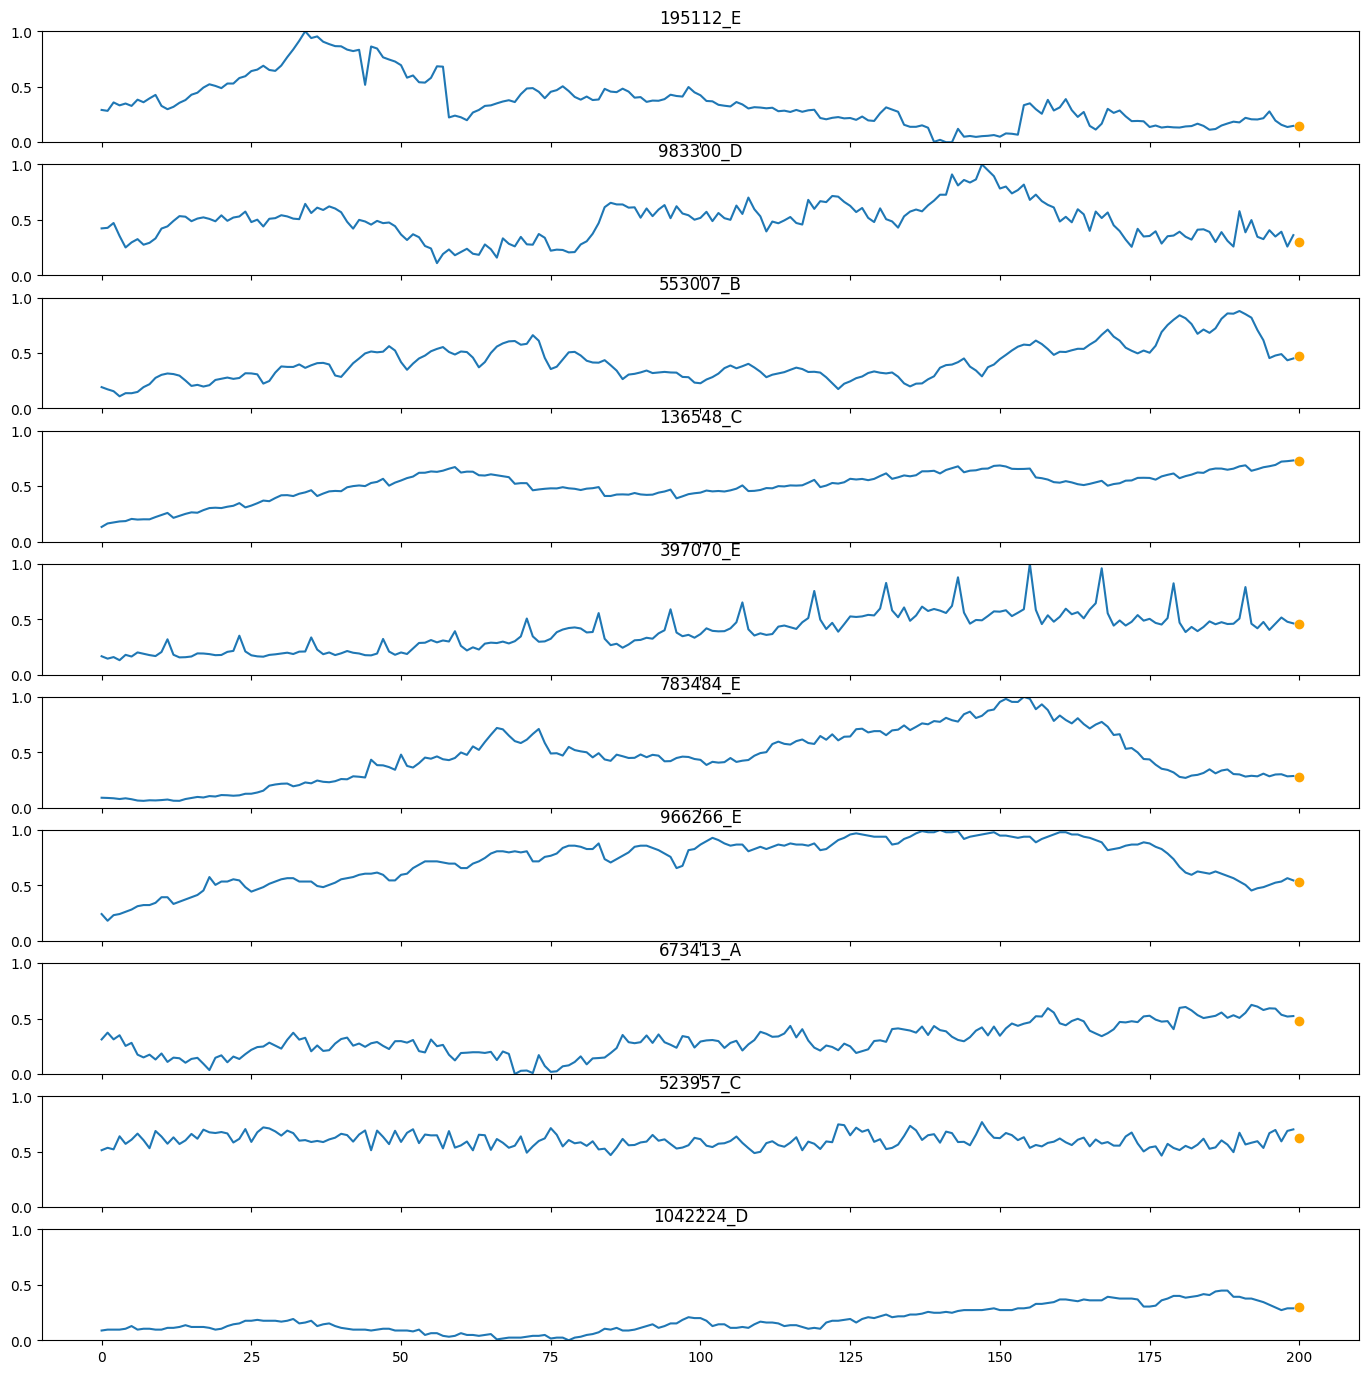

In [10]:
# randomly plot 10 sequences including targets
def inspect_sequences(X, y, telescope):
    figs, axs = plt.subplots(10, 1, sharex=True, figsize=(17,17))
    for i, val in enumerate([randint(0, X.shape[0]) for _ in range(10)]):
        axs[i].plot(np.arange(len(X[val])), X[val])
        axs[i].scatter(np.arange(len(X[val]), len(X[val])+telescope), y[val], color='orange')
        axs[i].set_title(str(val) + "_" + sequences_categories_train[val])
        axs[i].set_ylim(0,1)
    plt.show()

inspect_sequences(sequences_train, targets_train, 1)

## Data Augmentation

In [ ]:
# pip install tsgm
# import tsgm
# data = sequences_train.reshape(1, *sequences_train.shape)

# # Create and apply the GaussianNoise augmentation model
# aug_model = tsgm.models.augmentations.GaussianNoise()
# samples = aug_model.generate(X=data, n_samples=1, variance=0.01)

# # After augmentation, reshape the samples back to (n_samples, n_series, n_timesteps)
# sequences_train = samples.reshape(*data.shape[1:])

Model: "CONV_LSTM_Transformer_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer_cat (InputLaye  [(None, 6)]                  0         []                            
 r)                                                                                               
                                                                                                  
 reshape (Reshape)           (None, 6, 1)                 0         ['input_layer_cat[0][0]']     
                                                                                                  
 input_layer_seq (InputLaye  [(None, 200, 1)]             0         []                            
 r)                                                                                               
                                                                        

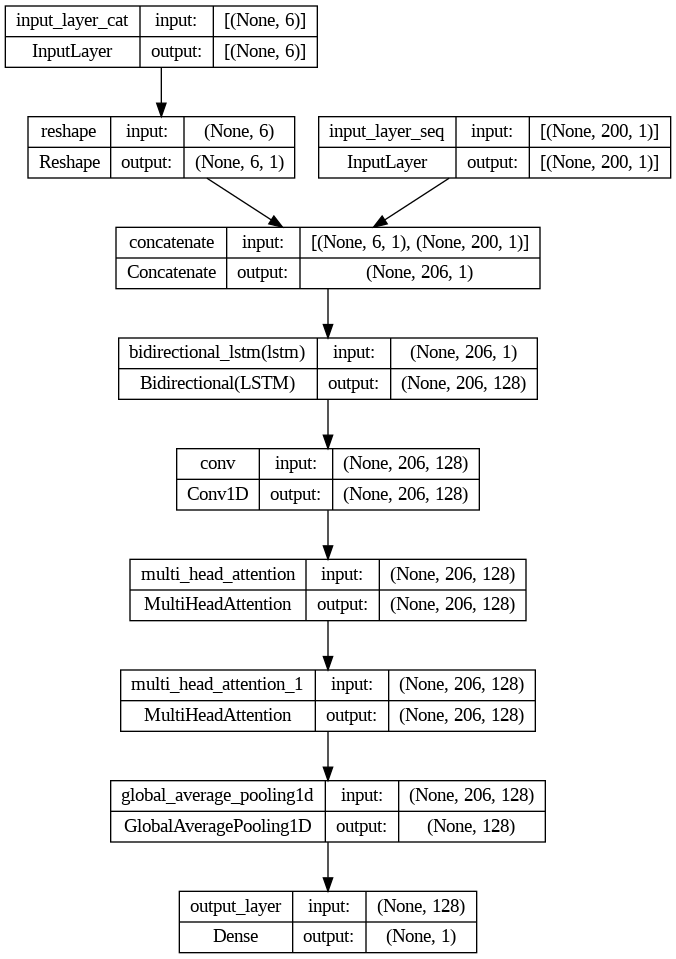

In [11]:
def build_transformer_model(output_length=1, num_heads=2, attention_dim=32, num_attention_blocks=4):

    input_layer_seq = layers.Input(shape=(sequences_train.shape[1], 1), name='input_layer_seq')
    input_layer_cat = layers.Input(shape=(6), name='input_layer_cat')

    categories_head_output = tf.keras.layers.Reshape((6, 1))(input_layer_cat)

    x = layers.Concatenate(axis=1)([categories_head_output, input_layer_seq])

    x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, name='lstm'), name='bidirectional_lstm')(x)

    x = layers.Conv1D(128, 1, padding='causal', activation='relu', name='conv')(x)

    for _ in range(num_attention_blocks):
        x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=attention_dim)(x, x)

    x = layers.GlobalAveragePooling1D()(x)

    output_layer = layers.Dense(output_length, activation='linear', name='output_layer')(x)
    
    model = keras.Model(inputs=[input_layer_seq, input_layer_cat], outputs=output_layer, name='CONV_LSTM_Transformer_model')

    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer=tf.keras.optimizers.Adam(1e-3))

    return model

# Build the model
model = build_transformer_model(
    output_length=1,
    num_heads=4,
    attention_dim=32,
    num_attention_blocks=2)
model.summary()
keras.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [12]:
sequences_categories_train[sequences_categories_train == 'A'] = 0
sequences_categories_train[sequences_categories_train == 'B'] = 1
sequences_categories_train[sequences_categories_train == 'C'] = 2
sequences_categories_train[sequences_categories_train == 'D'] = 3
sequences_categories_train[sequences_categories_train == 'E'] = 4
sequences_categories_train[sequences_categories_train == 'F'] = 5

sequences_categories_train = keras.utils.to_categorical(sequences_categories_train, num_classes=6)

sequences_categories_val[sequences_categories_val == 'A'] = 0
sequences_categories_val[sequences_categories_val == 'B'] = 1
sequences_categories_val[sequences_categories_val == 'C'] = 2
sequences_categories_val[sequences_categories_val == 'D'] = 3
sequences_categories_val[sequences_categories_val == 'E'] = 4
sequences_categories_val[sequences_categories_val == 'F'] = 5

sequences_categories_val = keras.utils.to_categorical(sequences_categories_val, num_classes=6)

print(sequences_categories_train[:10])

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]


## Outlier Detection

In [ ]:
# compute mean and standard deviation for every sequence
# mean_train = np.mean(sequences_train, axis=1)
# std_train = np.std(sequences_train, axis=1)

# mean_val= np.mean(sequences_val, axis=1)
# std_val = np.std(sequences_val, axis=1)

# print(sequences_train.shape)

In [ ]:
# # remove sequences with standard deviation = 0 (all the same values -> no valuable training data)
# non_zero_std_rows_train = std_train != 0
# non_zero_std_rows_val = std_val != 0

# std_train = std_train[non_zero_std_rows_train]
# mean_train = mean_train[non_zero_std_rows_train]
# sequences_train = sequences_train[non_zero_std_rows_train]
# targets_train = targets_train[non_zero_std_rows_train]
# sequences_categories_train = sequences_categories_train[non_zero_std_rows_train]

# std_val = std_val[non_zero_std_rows_val]
# mean_val = mean_val[non_zero_std_rows_val]
# sequences_val = sequences_val[non_zero_std_rows_val]
# targets_val = targets_val[non_zero_std_rows_val]
# sequences_categories_val = sequences_categories_val[non_zero_std_rows_val]

# print(sequences_train.shape)

In [ ]:
# # remove sequences where target is far away from mean (anomaly detection)
# target_mean_diff = np.absolute(targets_train - np.expand_dims(mean_train, axis=1))
# # express in terms of std (z score)
# target_mean_diff = target_mean_diff / np.expand_dims(std_train, axis=1)
# print(np.min(target_mean_diff))
# print(np.max(target_mean_diff))
# print((target_mean_diff > 10).sum())

# histogram_data = target_mean_diff.astype(int)
# counts, bins = np.histogram(histogram_data)
# plt.stairs(counts, bins)

# non_anomaly_train = np.squeeze(target_mean_diff < 10)

# std_train = std_train[non_anomaly_train]
# mean_train = mean_train[non_anomaly_train]
# sequences_train = sequences_train[non_anomaly_train]
# targets_train = targets_train[non_anomaly_train]
# sequences_categories_train = sequences_categories_train[non_anomaly_train]

# print(sequences_train.shape)

In [ ]:
# histogram_data = (target_mean_diff[target_mean_diff < 10]).astype(int)
# counts, bins = np.histogram(histogram_data)
# plt.stairs(counts, bins)

## Standard Scaling applied to the training sequences

In [ ]:
# standard scaling
# sequences_train = sequences_train - np.expand_dims(mean_train, axis=1)
# sequences_train = sequences_train / np.expand_dims(std_train, axis=1)
# targets_train = targets_train - np.expand_dims(mean_train, axis=1)
# targets_train = targets_train / np.expand_dims(std_train, axis=1)

# sequences_val = sequences_val - np.expand_dims(mean_val, axis=1)
# sequences_val = sequences_val / np.expand_dims(std_val, axis=1)
# targets_val = targets_val - np.expand_dims(mean_val, axis=1)
# targets_val = targets_val / np.expand_dims(std_val, axis=1)

## Training

In [13]:
# Train the transformer model
history = model.fit(
    [sequences_train, sequences_categories_train],
    targets_train,
    epochs=30,
    batch_size=128,
    validation_data = ([sequences_val, sequences_categories_val], targets_val),
    callbacks = [
        keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=7, restore_best_weights=True),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', mode='min', patience=5, factor=0.1, min_lr=1e-5)
    ]
    )

Epoch 1/30
8492/8492 [==============================] - 346s 40ms/step - loss: 0.0055 - val_loss: 0.0040 - lr: 0.0010
Epoch 2/30
8492/8492 [==============================] - 340s 40ms/step - loss: 0.0035 - val_loss: 0.0033 - lr: 0.0010
Epoch 3/30
8492/8492 [==============================] - 337s 40ms/step - loss: 0.0032 - val_loss: 0.0030 - lr: 0.0010
Epoch 4/30
8492/8492 [==============================] - 335s 39ms/step - loss: 0.0031 - val_loss: 0.0030 - lr: 0.0010
Epoch 5/30
8492/8492 [==============================] - 336s 40ms/step - loss: 0.0036 - val_loss: 0.0032 - lr: 0.0010
Epoch 6/30
8492/8492 [==============================] - 323s 38ms/step - loss: 0.0029 - val_loss: 0.0030 - lr: 0.0010
Epoch 7/30
8492/8492 [==============================] - 322s 38ms/step - loss: 0.0028 - val_loss: 0.0027 - lr: 0.0010
Epoch 8/30
8492/8492 [==============================] - 323s 38ms/step - loss: 0.0027 - val_loss: 0.0026 - lr: 0.0010
Epoch 9/30
8492/8492 [==============================] - 

In [14]:
# Save the best model
model.save('AttentionModel')

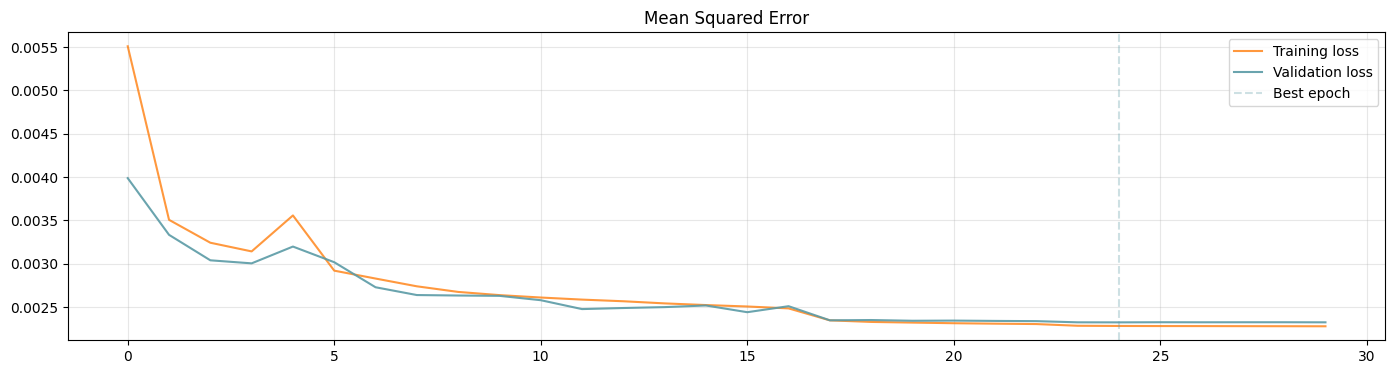

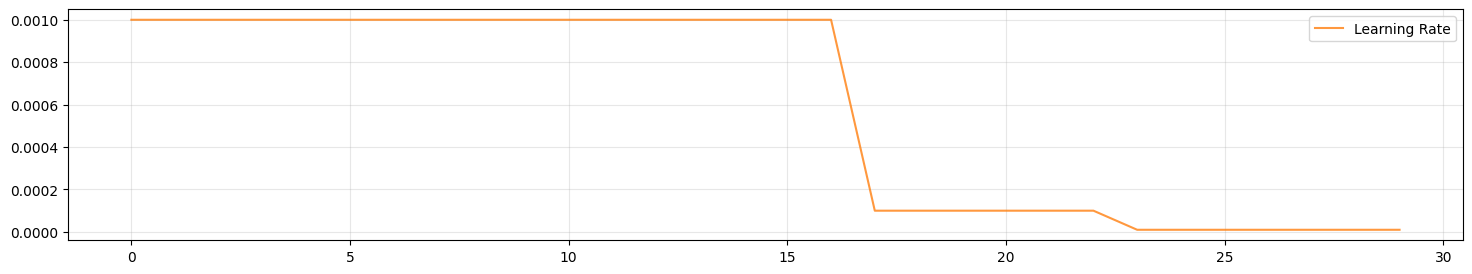

In [15]:
history = history.history
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [ ]:
# Predict the test set using the model
predictions = model.predict([sequences_val, sequences_categories_val], verbose=0)

# Print the shape of the predictions
print(f"Predictions shape: {predictions.shape}")

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = keras.metrics.mean_squared_error(targets_val.flatten(), predictions.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = keras.metrics.mean_absolute_error(targets_val.flatten(), predictions.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")

In [ ]:
# predict 9 steps into the future (have to be computed seperatly)
res = sequences_val
for i in range(9):
  pred = model.predict([res, sequences_categories_val])
  res = np.hstack((res, pred))
  res = res[:, 1:]
predictions_9 = res[:, -9:]